In [1]:
#@title 📦 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#@title 📂 2. Load Dataset
df = pd.read_csv('/content/delhi_aqi.csv')

In [3]:
#@title 🧹 3. Data Cleaning
print("Columns:", df.columns.tolist())
df = df.fillna(method='ffill')

Columns: ['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']


<ipython-input-3-e8e4ce9ab7ed>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [4]:
#@title 📈 4. Create Synthetic AQI Index (weighted)
df['AQI'] = (
    df['pm2_5'] * 0.4 +
    df['pm10'] * 0.3 +
    df['no2'] * 0.1 +
    df['so2'] * 0.05 +
    df['co'] * 0.1 +
    df['o3'] * 0.05
)

In [5]:
#@title 🎯 5. Feature Selection
features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
X = df[features]
y = df['AQI']

In [6]:
#@title 🤖 6. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#@title 🏗️ 7. Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
#@title 📊 8. Evaluate Model
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MAE: 3.615256311235355
RMSE: 6.5824950591530955
R²: 0.9997846208058848


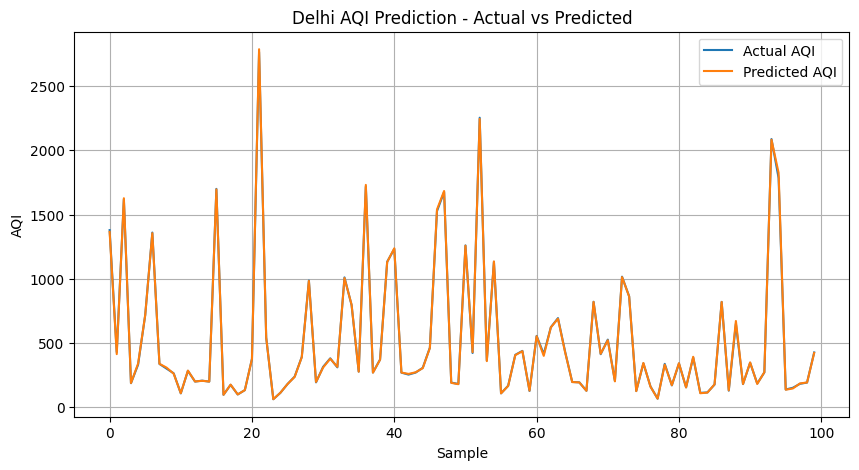

In [9]:
#@title 📉 9. Plot Actual vs Predicted AQI
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual AQI')
plt.plot(y_pred[:100], label='Predicted AQI')
plt.legend()
plt.title("Delhi AQI Prediction - Actual vs Predicted")
plt.xlabel("Sample")
plt.ylabel("AQI")
plt.grid(True)
plt.show()